## Loss와 Metric
* Loss : 모델 학습시 학습데이터(train data)를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수
* Metric : 모델 학습 종료 후 테스트데이터(test data)를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수

## Threshold
예를들어 분류 모델의 경우, 학습시킨 모델의 출력이 일정 이상 기준선(Threshold)를 넘어가면 양성이라고 분류하게 됨. 그런데 이 기준선은 뭘까?
* 모델의 파라미터 등은 변한 것이 없지만 모델의 출력값을 해석하는 방식만 달라져도 모델은 전혀 다른 성능을 가지게 된다.
* 즉, 모델의 성능은 F1 score같은 숫자 하나로만 규정될 수 있는 것이 아니다.
* 이처럼 Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법으로 `PR(Precision and Recall) Curve`와 `ROC(Receiver Operating Characteristic) Curve)`를 그려보는 방법이 있다.

In [1]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)

(150, 4)


#### Task의 재구성

In [2]:
# 잡음 추가
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)

(150, 804)


In [3]:
# 이진 분류 문제로 줄임
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


In [4]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

In [5]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

SVM에는 별도로 제공하는 `decision_function()` 함수가 존재한다.
* (-1,1)
* 0보다 작으면 음성(label=0), 0보다 크면 양성(label=1)

In [8]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



### Threshold 변화에 따른 성능 측정

In [10]:
# threshold = -0.1
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [11]:
# threshold = -0.2
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [12]:
# threshold = 0.1
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [13]:
# threshold = 0.2
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



## PR 커브와 AUC

In [15]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.91')

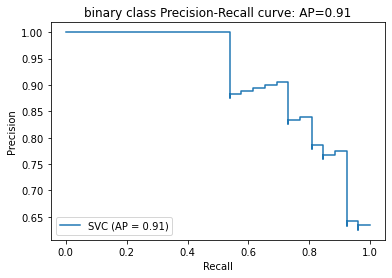

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

* 가급적 Precision과 Recall이 모두 1에 가까워야 한다.
* Threshold값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로 위와 같은 PR 커브 아래 면적을 계산하는 방법이 있는데, 이를 `AUC(Area Under Curve)`라고 한다.
* PR AUC는 사이킷런의 `average_precision_score`함수를 사용

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

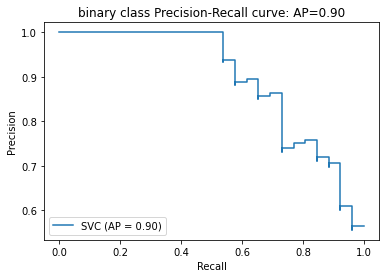

In [17]:
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## ROC 커브
ROC : Receiver Operating Characteristic Curve(수신자 조작 특성)
* Confusion Matrix 수치를 활용해 classifier의 분류 성능을 그래프로 표현하는 방법.
* PR 커브처럼 분류기의 Threshold 값의 변화에 따라 Confusion Matrix에 변화가 생기므로 사용하는 것이다.
* ROC 커브는 `TP Rate`축과 `FP Rate`축으로 이루어졌다.
    * TPR(Sensitivity = recall) = TP / (TP + FN)
    * FPR(1-sensitivity) = FP / (TN + FP)
* ROC AUC가 넓을수록 좋은 성능의 모델이다.

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

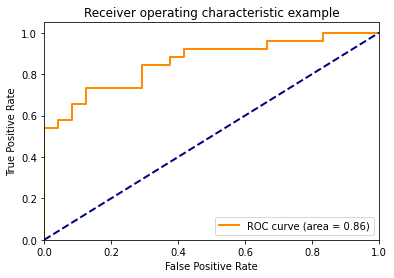

auc result:0.8605769230769231


In [19]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까요? 네, 바로 (0, 1)일 것입니다. 양성과 음성에 대한 Recall이 모두 1이 될 테니 TPR은 1, FPR은 0이 될 것입니다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요? 이땐 이 분류기가 (1, 1)에 찍힐 것입니다. 반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0, 0)에 찍힐 것입니다. 이번엔 완벽한 랜덤 분류기를 가정해 봅시다. 이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양성이라고 분류할 것입니다. 이 랜덤분류기의 Recall은 p가 될 것입니다. 음성에 대한 Recall도 p가 될 테니 이 분류기는 (p, 1-p)에 찍힐 것입니다.

위 그래프에서 (0, 0)과 (1, 1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우입니다. 그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며, 가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다. 그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다.

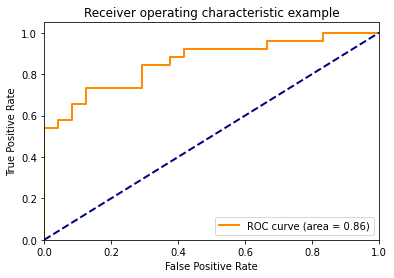

auc result:0.8605769230769231


In [20]:
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

## Evaluation metric
### Regression model
회귀 모델은 분류 모델에 비해 평가척도를 다루는 것이 간단합니다. loss 함수가 테스트셋에 적용될 때 그대로 Metric이 되는 경우가 대부분입니다. 그래서 회귀 모델의 경우에는 어떤 loss가 적합한지 그 특성을 알아보는 것이 중요하게 됩니다.
* MSE, RMSE : 오차의 제곱에 비례하여 수치가 늘어나므로, 특이값(Outlier)에 민감하게 반응
* MAE, MAPE :  오차의 절대값에 비례해서 수치가 늘어나는데 상대적으로 특이값에 민감하지 않고 Outlier가 많은 데이터에 대해 Robust

### Ranking model
추천시스템은 넓게 보면 정보 검색(Information Retrieval)과 같은 로직을 가지고 있습니다. 이런 모델들이 일반적인 분류모델과 다른 점은, **랭킹(우선순위)** 개념이 추가된다는 점입니다. User를 입력으로 했을 때, Item들이 추천할만한지 여부를 분류만 하는 것이 아니라, 얼마나 추천할만 한지 랭킹까지 매겨야 한다는 점입니다.
* NDCG : 랭킹을 매기기 위해 임의성을 배제하고 모든 콘텐츠 아이템에 대한 관련성을 계산하여 랭킹에 반영

### 이미지 생성 모델
모델을 평가한다는 것은 결국 정답과 모델의 예측치 사이의 거리를 측정하는 방식입니다. 그런데 이미지 생성 모델에서 원본 이미지와 새로운 이미지 사이의 거리를 어떻게 측정할 수 있을까요?
* MSE, PSNR :픽셀 단위 비교
* SSIM : 픽셀 단위 비교보다는 이미지 내의 구조적 차이에 집중하는 방식

### 기계번역 모델
이미지 생성모델에서 원본과 생성본을 비교하여 거리를 잰다는 것은 까다롭긴 하지만 RGB 공간 등 두 이미지 사이의 거리를 측정할 수 있는 개념적 공간이 존재합니다. 그러나 텍스트라면 어떨까요? 텍스트 생성 모델 중 가장 대중적인 것은 기계번역 모델입니다. 영어를 한국어로 번역한 문장이 정답 한국어와 얼마나 비슷한지를 어떻게 측정하면 좋을까요?
* BLEU Score : 두 텍스트가 얼마나 겹치는지를 측정하는 척도. 1-gram, 2-gram, 3-gram, 4-gram이 두 문장 사이에 몇번이나 공통되게 출현하는지를 측정.